# Software Vulnerability Detection using Deep Learning (Experiment Replication)

### Multicolumn experiment (All CWEs and others)

* This is from Russell et. al work (Automated Vulnerability Detection in Source Code Using Deep Representation Learning) https://arxiv.org/abs/1807.04320
* Datasets downloaded from https://osf.io/d45bw/
* Datasets distribution: Training (80%), Validation (10%), Testing (10%)
* The dataset consists of the source code of 1.27 million functions mined from open source software, labeled by static analysis for potential vulnerabilities.
* Each function's raw source code, starting from the function name, is stored as a variable-length UTF-8 string. Five binary 'vulnerability' labels are provided for each function, corresponding to the four most common CWEs in our data plus all others: 
 * CWE-120 (3.7% of functions)
 * CWE-119 (1.9% of functions)
 * CWE-469 (0.95% of functions)
 * CWE-476 (0.21% of functions)
 * CWE-other (2.7% of functions)
* Functions may have more than one detected CWE each.
* Python 3.6 and Tensorflow 2.0.0

In [372]:
import mlflow

## Pre-processing

Converting the HDF5 files for training/validation/testing datasets to python pickle for ease of future usage

In [2]:
import h5py
import pandas as pd


In [3]:
#pip install h5py==2.10.0

In [4]:
h5py.__version__

'2.10.0'

In [5]:
import tensorflow as tf
tf.__version__

'2.4.4'

In [377]:
tf.keras.__version__

'2.4.0'

In [6]:
#mydf['CWE-276']=list(data['CWE-276']); mydf['CWE-532']=list(data['CWE-532']); mydf['CWE-295']=list(data['CWE-295']); mydf['CWE-89']=list(data['CWE-89']); mydf['CWE-327']=list(data['CWE-327']);  mydf['CWE-312']=list(data['CWE-312']);  mydf['CWE-330']=list(data['CWE-330']);  mydf['CWE-619']=list(data['CWE-619'])  ;  mydf['CWE-200']=list(data['CWE-200']) ;  mydf['CWE-749']=list(data['CWE-749']) ;  mydf['CWE-919']=list(data['CWE-919']) ;  mydf['CWE-250']=list(data['CWE-250']) ;  mydf['CWE-502']=list(data['CWE-502']) 

In [7]:
# for dataset in [mydf_train,mydf_val,mydf_test]:
#      for col in range(3,15):
#          if type(dataset.iloc[:,col]) is bool:
#             dataset.iloc[:,col] = dataset.iloc[:,col].map({'FALSE': 0, 'TRUE': 1,'1':1,'0':0,'1.0':1,'0.0':0})
         
# mydf_train.head()

In [8]:
# mydf_train.to_pickle("VDISC_train.pickle")
# mydf_val.to_pickle("VDISC_validate.pickle")
# mydf_test.to_pickle("VDISC_test.pickle")

## Exploratory Data Analysis

### Importing processed datasets

In [9]:
# train1=pd.read_pickle("VDISC_train.pickle")
# validate=pd.read_pickle("VDISC_validate.pickle")
# test=pd.read_pickle("VDISC_test.pickle")

In [10]:
data=pd.read_csv("DataSet1000.csv")
# validate=pd.read_csv()
# test=pd.read_csv()

In [468]:
data.tail()

,Name,Impact
31967,"public native String getNativeCode(String str,...",1
31968,private static String byteToHex(byte[] hash) \...,1
31969,public synchronized void generate(StringBuilde...,1
31970,public String generate() \n StringBuild...,1
31971,public void checkClientTrusted(X509Certificate...,1


In [12]:
#data[data['Impact'] == 'NV'].to_csv("DataSet_NV.csv", index=False)

In [13]:
#data[data['Impact'] == 'warning'].to_csv("DataSet_w.csv", index=False)

In [14]:
#data[data['Impact'] == 'high'].to_csv("DataSet_h.csv", index=False)

In [15]:
data=pd.read_csv("DataSet_whnv.csv")

In [16]:
data.head()

,Name,Category,Impact,CWE-749,CWE-312,CWE-295,CWE-276,CWE-327,CWE-330,CWE-200,CWE-89,CWE-919,CWE-649,CWE-250
0,"public void addJavascriptObject(Object obj, St...",0,warning,1,0,0,0,0,0,0,0,0,0,0
1,public void initialize() \n setPlacemen...,0,warning,1,0,0,0,0,0,0,0,0,0,0
2,public void initialize() \n setPlacemen...,0,warning,1,0,0,0,0,0,0,0,0,0,0
3,public void displayRichMedia(final JSONObject ...,0,warning,1,0,0,0,0,0,0,0,0,0,0
4,this.webView.addJavascriptInterface(this.jsBri...,0,warning,1,0,0,0,0,0,0,0,0,0,0


In [17]:
for dataset in [data]:
    for col in range(2,14):
            dataset.iloc[:,col] = dataset.iloc[:,col].map({'False':0, 'True':1,False:0, True:1,'1':1,'0':0,'1.0':1,'0.0':0, 'NV':1, 'warning':0, 'high': 0})
                    
            
            
data.to_csv("DataSet_b.csv",index=False)


In [18]:
dataset.head()

,Name,Category,Impact,CWE-749,CWE-312,CWE-295,CWE-276,CWE-327,CWE-330,CWE-200,CWE-89,CWE-919,CWE-649,CWE-250
0,"public void addJavascriptObject(Object obj, St...",0,0,1,0,0,0,0,0,0,0,0,0,0
1,public void initialize() \n setPlacemen...,0,0,1,0,0,0,0,0,0,0,0,0,0
2,public void initialize() \n setPlacemen...,0,0,1,0,0,0,0,0,0,0,0,0,0
3,public void displayRichMedia(final JSONObject ...,0,0,1,0,0,0,0,0,0,0,0,0,0
4,this.webView.addJavascriptInterface(this.jsBri...,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
del data['Category']


for col in data:
    if col != "Name":
        if data[col].value_counts()[1] < 1000:
            # data1 = data.drop(col, axis=1)
            del data[col]
     
data.to_csv("DataSet_bb1.csv",index=False)

In [20]:
dataset.head()

,Name,Impact,CWE-312,CWE-276,CWE-327,CWE-200,CWE-89
0,"public void addJavascriptObject(Object obj, St...",0,0,0,0,0,0
1,public void initialize() \n setPlacemen...,0,0,0,0,0,0
2,public void initialize() \n setPlacemen...,0,0,0,0,0,0
3,public void displayRichMedia(final JSONObject ...,0,0,0,0,0,0
4,this.webView.addJavascriptInterface(this.jsBri...,0,0,0,0,0,0


In [21]:
del data['CWE-276']
del data['CWE-312']
del data['CWE-327']
del data['CWE-200']
del data['CWE-89']
data.to_csv("DataSet_bbnew.csv",index=False)

In [22]:
colm = []
for col in data:
    colm.append(col)

In [23]:
colm

['Name', 'Impact']

In [24]:
for dataset in data:
    dataset=dataset

In [25]:
dataset

'Impact'

In [26]:
### CONTINUE LATER
data.head()

,Name,Impact
0,"public void addJavascriptObject(Object obj, St...",0
1,public void initialize() \n setPlacemen...,0
2,public void initialize() \n setPlacemen...,0
3,public void displayRichMedia(final JSONObject ...,0
4,this.webView.addJavascriptInterface(this.jsBri...,0


In [27]:

print(data['Impact'].value_counts())



1    15999
0    15973
Name: Impact, dtype: int64


In [392]:
data[data.columns[-1]].value_counts()[1]+1

1318

In [28]:
shuffled = data.sample(frac=1).reset_index(drop=True) #for randomizing data

In [29]:
shuffled.head()

,Name,Impact
0,"static final String H_ACCURACY_KEY = ""h_accura...",0
1,public Intent toIntent() \n String acti...,0
2,public static final String SERVICE_GET_BOARDIN...,0
3,public static byte[] a(byte[] bArr) \n ...,0
4,"public static final String ORG_SERVER_ADDR = ""...",0


In [30]:
shuffled[shuffled.columns[1:14]]

,Impact
0,0
1,0
2,0
3,0
4,0
...,...
31967,0
31968,1
31969,0
31970,0


In [31]:
from sklearn.model_selection import train_test_split

In [494]:
x_tmp, x_test, y_tmp, y_test = train_test_split(shuffled["Name"], shuffled[shuffled.columns[1:14]], test_size=0.2, random_state=42)

In [495]:
x_test[6]

'public static File a(String str) \n        String externalStorageState = Environment.getExternalStorageState();\n        if (externalStorageState.equals("mounted")) \n            return new File(Environment.getExternalStorageDirectory().getAbsolutePath() + "/" + str);\n        \n        c.d(f2366b, "External storage state not mounted. State:" + externalStorageState);\n        return null;\n    '

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_tmp, y_tmp, test_size=0.1, random_state=42)

In [34]:
#data['Impact'].value_counts()

In [185]:
#x_test

In [193]:
y_val.value_counts()

Impact
0         1306
1         1252
dtype: int64

## Learning Phase

### Importing libraries

In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import pickle

#from numba import jit, cuda

print("Tensorlfow version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensorlfow version:  2.4.4
Eager mode:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


### Setting static and global variables

In [38]:
# Generate random seed
#myrand=np.random.randint(1, 99999 + 1)
myrand=71926
np.random.seed(myrand)
tf.random.set_seed(myrand)
print("Random seed is:",myrand)

Random seed is: 71926


In [39]:
# Set the global value
WORDS_SIZE=20000
INPUT_SIZE=500
NUM_CLASSES=1
MODEL_NUM=0
EPOCHS=50

### Importing processed datasets

### Tokenizing the source codes

In [405]:
# token_list_train = [i.decode("utf-8") for i in x_train]
# token_list_test = [i.decode("utf-8") for i in x_test]
# token_list_val = [i.decode("utf-8") for i in x_val]


In [406]:
# t = []
# if(1==1):
#     t.append([1,0])
# t

In [407]:
#token_list_train[0]
# token_list_test[0]
# token_list_val[0]

In [40]:
# Tokenizer with word-level(text to vectors)
tokenizer_train = tf.keras.preprocessing.text.Tokenizer(char_level=False)
tokenizer_test = tf.keras.preprocessing.text.Tokenizer(char_level=False)
tokenizer_val = tf.keras.preprocessing.text.Tokenizer(char_level=False)
#tokenizer.fit_on_texts(list(x_all))
# tokenizer.fit_on_texts(list(str(x_all)))
tokenizer_train.fit_on_texts(list(x_train))
tokenizer_test.fit_on_texts(list(x_test))
tokenizer_val.fit_on_texts(list(x_val))
# del(x_all)
print('Number of tokens of x_train: ',len(tokenizer_train.word_counts))
print('Number of tokens of x_test: ',len(tokenizer_test.word_counts))
print('Number of tokens of x_val: ',len(tokenizer_val.word_counts))

Number of tokens of x_train:  43214
Number of tokens of x_test:  23283
Number of tokens of x_val:  14645


In [41]:
# Reducing to top N words
tokenizer_train.num_words = WORDS_SIZE
tokenizer_test.num_words = WORDS_SIZE
tokenizer_val.num_words = WORDS_SIZE

In [42]:
#tokenizer_train.word_counts.items()


In [43]:
#tokenizer_test.word_counts.items()

In [44]:
#tokenizer_val.word_counts.items()

In [45]:
# Top 10 words
sorted(tokenizer_train.word_counts.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted(tokenizer_test.word_counts.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted(tokenizer_val.word_counts.items(), key=lambda x:x[1], reverse=True)[0:10]

[('this', 9363),
 ('if', 4498),
 ('string', 4013),
 ('a', 3930),
 ('null', 3349),
 ('new', 3063),
 ('return', 2668),
 ('0', 2434),
 ('public', 2290),
 ('com', 2008)]

In [46]:
type(list(shuffled['Name'])[0])

str

### Create sequence files from the tokens

In [47]:
## Tokkenizing train data and create matrix
list_tokenized_train = tokenizer_train.texts_to_sequences(x_train)
x_train = tf.keras.preprocessing.sequence.pad_sequences(list_tokenized_train, 
                                  maxlen=INPUT_SIZE,
                                  padding='post')
x_train = x_train.astype(np.int64)

In [194]:
x_train

array([[ 48,  19,   4, ...,   0,   0,   0],
       [  9,  24,   3, ...,   0,   0,   0],
       [ 48,  16, 101, ...,   0,   0,   0],
       ...,
       [  9,  19,  37, ...,   0,   0,   0],
       [  9,  24,  47, ...,   0,   0,   0],
       [ 48,  24,  47, ...,   0,   0,   0]], dtype=int64)

In [48]:
x_train.shape

(23019, 500)

In [49]:
## Tokkenizing test data and create matrix
list_tokenized_test = tokenizer_test.texts_to_sequences(x_test)
x_test = tf.keras.preprocessing.sequence.pad_sequences(list_tokenized_test, 
                                 maxlen=INPUT_SIZE,
                                 padding='post')
x_test = x_test.astype(np.int64)

In [50]:
x_test.shape

(6395, 500)

In [51]:
## Tokkenizing validate data and create matrix
list_tokenized_validate = tokenizer_val.texts_to_sequences(x_val)
x_validate = tf.keras.preprocessing.sequence.pad_sequences(list_tokenized_validate, 
                                 maxlen=INPUT_SIZE,
                                 padding='post')
x_validate = x_validate.astype(np.int64)

In [195]:
# Example data
#test.iloc[0:2,:15]
#x_test

### One-Hot-Enconding (OHE) on the datasets

In [196]:
#train.iloc[:,2][5]
#x_train

In [54]:
y_train.head()

,Impact
25371,1
15997,1
27899,0
6371,1
6256,1


In [55]:
x_train

array([[ 48,  19,   4, ...,   0,   0,   0],
       [  9,  24,   3, ...,   0,   0,   0],
       [ 48,  16, 101, ...,   0,   0,   0],
       ...,
       [  9,  19,  37, ...,   0,   0,   0],
       [  9,  24,  47, ...,   0,   0,   0],
       [ 48,  24,  47, ...,   0,   0,   0]], dtype=int64)

In [56]:
y_train_array = np.array(y_train)

In [202]:
y_train_array.shape

(23019, 1)

In [58]:
y_test_array = np.array(y_test)

In [59]:
y_val_array = np.array(y_val)

In [60]:
# y_train_array=[]
# y_test_array=[]
# y_val_array=[]
# #/////////////////////////////////////////////////
# for col in range(0,11):
#     y_train_array.append(tf.keras.utils.to_categorical(y_train.iloc[:,col], num_classes=NUM_CLASSES).astype(np.int64))
#     y_test_array.append(tf.keras.utils.to_categorical(y_test.iloc[:,col], num_classes=NUM_CLASSES).astype(np.int64))
#     y_val_array.append(tf.keras.utils.to_categorical(y_val.iloc[:,col], num_classes=NUM_CLASSES).astype(np.int64))

In [61]:
y_test_array[0]

array([1], dtype=int64)

In [206]:
y_train_array.shape

(23019, 1)

In [63]:
y_test_array[0][0:10]

array([1], dtype=int64)

In [64]:
# Example data
y_test_array[0].__len__()

1

In [65]:
y_test_array[0][1:10]

array([], dtype=int64)

In [66]:
y_train_array

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [67]:
len(y_train_array)

23019

### Model Definition (CNN with Gaussian Noise and 5 Output Splits)

In [113]:
# Create a random weights matrix
random_weights = np.random.normal(size=(WORDS_SIZE, 256),scale=0.01)

In [374]:
# Must use non-sequential model building to create branches in the output layer
inp_layer = tf.keras.layers.Input(shape=(INPUT_SIZE,))
mid_layers = tf.keras.layers.Embedding(input_dim = WORDS_SIZE,
                                    output_dim = 256,
                                    weights=[random_weights],
                                    input_length = INPUT_SIZE)(inp_layer)

mid_layers = tf.keras.layers.Convolution1D(filters=512, kernel_size=(9), padding='same', activation='relu')(mid_layers)
mid_layers = tf.keras.layers.MaxPool1D(pool_size=6)(mid_layers)
mid_layers = tf.keras.layers.Dropout(0.5)(mid_layers)
mid_layers = tf.keras.layers.Flatten()(mid_layers)
mid_layers = tf.keras.layers.Dense(64, activation='relu')(mid_layers)
mid_layers = tf.keras.layers.Dense(32, activation='relu')(mid_layers)

mid_layers = tf.keras.layers.Dense(32, activation='relu')(mid_layers)
mid_layers = tf.keras.layers.Dense(32, activation='relu')(mid_layers)

mid_layers = tf.keras.layers.Dense(16, activation='relu')(mid_layers)
mid_layers = tf.keras.layers.Dense(16, activation='relu')(mid_layers)
mid_layers = tf.keras.layers.Dense(16, activation='relu')(mid_layers)
output1 = tf.keras.layers.Dense(1, activation='sigmoid')(mid_layers)
# output2 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output3 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output4 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output5 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output6 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output7 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output8 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output9 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output10 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
# output11 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)


# output11 = tf.keras.layers.Dense(11, activation='softmax')(mid_layers)


# model = tf.keras.Model(inp_layer,[output1,output2,output3,output4,output5,output6,output7,output8,output9,output10,output11])
model = tf.keras.Model(inp_layer, output1)

# Define custom optimizers
# adam = tf.keras.optimizers.Adam(lr=1e-2, beta_1=0.9, beta_2=0.999, epsilon=1, decay=0.0, amsgrad=False)


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)





sgd = tf.keras.optimizers.SGD(learning_rate=lr_schedule)



## Compile model with metrics
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
print("CNN model built: ")
model.summary()

CNN model built: 
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 500, 256)          5120000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 500, 512)          1180160   
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 83, 512)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 83, 512)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 42496)             0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)  

In [95]:
# # model = tf.keras.models.load_model("model/model-ALL-23.hdf5")

# # Define custom optimizers
# adam = tf.keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1, decay=0.0, amsgrad=False)
# model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# print("CNN model built: ")
# model.summary()

### Tensorboard Callbacks

In [375]:
## Create TensorBoard callbacks

callbackdir= 'C:\\temp\\mobcnn-new'

tbCallback = tf.keras.callbacks.TensorBoard(log_dir=callbackdir, 
                         histogram_freq=1,
                         embeddings_freq=1,
                         write_graph=True, 
                         write_images=True)

tbCallback.set_model(model)
mld = 'model/model-ALL-{epoch:02d}.hdf5'

## Create best model callback
mcp = tf.keras.callbacks.ModelCheckpoint(filepath=mld, 
                                         monitor="val_loss",
                                         save_best_only=True, 
                                         mode='auto', 
                                         save_freq='epoch', 
                                         verbose=1)

In [118]:
import os 
os.getcwd()

'c:\\Users\\Administrator\\Desktop\\new'

### Model Training

In [119]:
x_train

array([[ 48,  19,   4, ...,   0,   0,   0],
       [  9,  24,   3, ...,   0,   0,   0],
       [ 48,  16, 101, ...,   0,   0,   0],
       ...,
       [  9,  19,  37, ...,   0,   0,   0],
       [  9,  24,  47, ...,   0,   0,   0],
       [ 48,  24,  47, ...,   0,   0,   0]], dtype=int64)

In [120]:
#del model

In [122]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes = [i for i in range(1)],
                                                 y=y_test_array_norm)

In [123]:
[i for i in range(6)]

[0, 1, 2, 3, 4, 5]

In [124]:
class_weights

array([1.])

In [125]:
class_weight = dict(enumerate(class_weights, 0))

In [126]:
class_weight

{0: 1.0}

In [127]:
class_weights

array([1.])

In [128]:
set(y_train_array[0])

{1}

In [129]:
y_test_array


array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [167]:
model = tf.keras.models.load_model("model\model-ALL-100.hdf5")

In [469]:
# class_weights = [{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.},{0: 1., 1: 11.}]
# class_weights = {
#     0: 0.0,
#     1: 6.6666,
#     2: 6.6666,
#     3: 6.6666,
#     4: 6.6666,
#     5: 6.6666,
#     6: 6.6666,
#     7: 6.6666,
#     8: 6.6666,
#     9: 6.6666,
#     10: 6.6666,
#     11: 6.6666
# }
mlflow.keras.autolog()
history = model.fit(x = x_train,
          y = y_train_array,
           validation_data = (x_validate, y_val_array),
          epochs = 100,
          batch_size = 1070,
          verbose = 1,
          #class_weight= class_weight,
          callbacks=[mcp,tbCallback])

with open(f'History/History-ALL-{EPOCHS}EP-CNN', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (c:\Users\Administrator\anaconda3\envs\svd\lib\site-packages\tensorflow\python\eager\context.py)

In [378]:
x_train

array([[ 48,  19,   4, ...,   0,   0,   0],
       [  9,  24,   3, ...,   0,   0,   0],
       [ 48,  16, 101, ...,   0,   0,   0],
       ...,
       [  9,  19,  37, ...,   0,   0,   0],
       [  9,  24,  47, ...,   0,   0,   0],
       [ 48,  24,  47, ...,   0,   0,   0]], dtype=int64)

### Model Evaluation using Testing Set

In [379]:
y_train_array

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [131]:
tf.__version__
h5py.__version__

'2.10.0'

In [413]:
model = tf.keras.models.load_model("model\model-ALL-47.hdf5")


In [414]:
results = model.evaluate(x_test, y_test_array, batch_size=128)
for num in range(0,len(model.metrics_names)):
    print(model.metrics_names[num]+': '+str(results[num]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
50/50 [==============================] - 2s 34ms/step - loss: 0.5593 - accuracy: 0.7459
loss: 0.5592838525772095
accuracy: 0.7458952069282532


### Check The Evaluation Metrics

In [415]:
predicted = model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [416]:
predicted[0]

array([0.8887179], dtype=float32)

In [417]:
np.argmax(predicted[0])

0

In [471]:
np.where(predicted< 0.5)

(array([   6,    7,   10, ..., 6388, 6389, 6392], dtype=int64),)

In [493]:
x_test[6]

array([   9,   95, 5299,    3,  205,  173,  155, 6954,   27,   58, 1963,
         58,   78,   58,  378,  205,    8, 1963,  393,  810, 1963, 1585,
       2016, 1723,  810, 1963, 1585, 2016,  151, 5299,  205,   16, 2517,
         14,   84,    7,  155, 6954,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [419]:
y_test_array[0][0]

1

In [420]:
predicted = np.squeeze(predicted)

In [421]:
predicted[0]

0.8887179

In [422]:
len(predicted)

6395

In [423]:
pred_test

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


In [424]:
# pred_test = []

# for col_value in range(0,len(predicted)):
#     if(value>=0.5):
#             #pred_test[col].append([1,0])
#         pred_test[value].append(1)
#     else:
#             #pred_test[col].append([0,1])
#         pred_test[value].append(0)
# #temp=[]
#temp1 = np.array([])

# for col in range(0,len(predicted)):
#     print(pd.value_counts(pred_test[col]))
    #if(pred_test[col]==0):
        #temp1.append([1,0])
    #else:
        #temp1.append([0,1])
#temp.transpose()

pred_test = []


for ele in predicted:
    if ele >= 0.5:
        #y_pred_test[col].append([1,0])
        pred_test.append(1)
    else:
        pred_test.append(0)


print(pd.value_counts(pred_test))


# for col in range(0,len(predicted)):
#     for row in predicted[col]:
#         if row >= 0.5:
#             #y_pred_test[col].append([1,0])
#             pred_test.append(1)
#         else:
#             pred_test.append(0)
#             #y_pred_test[col].append([0,1])
# for col in range(0,len(pred_test)):
#     print(pd.value_counts(pred_test))

0    3265
1    3130
dtype: int64


In [425]:
pred_test

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


In [466]:
#for
# i = i

In [427]:
#np.argmax(predicted)

In [428]:
predicted[predicted > 0.5].shape

(3130,)

In [429]:
i

array([0.5912667], dtype=float32)

In [430]:
y_test_1 = y_test_array

In [431]:
'''Y TEST LIST'''

y_pred_test = []


for ele in y_test_1:
    if ele >= 0.5:
        #y_pred_test[col].append([1,0])
        y_pred_test.append(1)
    else:
        y_pred_test.append(0)


print(pd.value_counts(pred_test))

# y_pred_test = []

# for col in range(0,len(y_test_1)):
#     for row in y_test_1[col]:
#         if row >= 0.5:
#             #y_pred_test[col].append([1,0])
#             y_pred_test.append(1)
#         else:
#             y_pred_test.append(0)
#             #y_pred_test[col].append([0,1])
# for col in range(0,len(y_test_1)):
#     print(pd.value_counts(y_pred_test))


#temp=[]
#temp1 = np.array([])

# for col in range(0,len(predicted)):
#     print(pd.value_counts(pred_test[col]))
    #if(pred_test[col]==0):
        #temp1.append([1,0])
    #else:
        #temp1.append([0,1])
#temp.transpose()

0    3265
1    3130
dtype: int64


In [432]:
# y_test_array_norm = []
# for x in y_test_array:
#     y_test_array_norm.append(np.argmax(x))


# y_test_array_norm = np.array(y_test_array_norm)

In [433]:
#y_test_array_norm

In [434]:
# pred_test_array_norm = []

# for x in predicted:
#     pred_test_array_norm.append(np.argmax(x))


# pred_test_array_norm = np.array(pred_test_array_norm)

In [435]:
#y_test_array_norm.shape

In [436]:
# np.argmax(x)

### Evaluate on the testing set

In [437]:
#pred_test[0][1]

In [438]:
#from sklearn.preprocessing import MultiLabelBinarizer

In [439]:
#y_test = MultiLabelBinarizer().fit_transform(test)
#pred_test= MultiLabelBinarizer().fit_transform(pred_test)


In [440]:
y_test_array.__len__()

6395

In [441]:
pred_test

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


In [442]:
y_pred_test.__len__()

6395

In [443]:
#confusion = sklearn.metrics.confusion_matrix(y_true=transformed_test, y_pred=transformed_test)\
# sklearn.metrics.accuracy_score(test[:,1],pred_test[0])

In [444]:
y_pred_test[1]


0

In [ ]:
pred_test[1][0]

In [446]:
y_test_array[0]

array([1], dtype=int64)

In [447]:
y_test_array.shape  

(6395, 1)

In [448]:
predicted.shape

(6395,)

In [462]:
#from sklearn.metrics import confusion_matrix
from sklearn.metrics  import multilabel_confusion_matrix

for col in range(0,1):
    print('\nThis is evaluation for column',col)
    #confusion=confusion_matrix(y_true=y_test[:,col], y_pred=pred_test[col-1])
    # confusion=multilabel_confusion_matrix(y_true=y_test_array, y_pred=predicted)
    confusion = sklearn.metrics.confusion_matrix(y_true=y_pred_test, y_pred=pred_test)
    #confusion = sklearn.metrics.confusion_matrix(y_true=y_test[col], y_pred=pred_test[col-1])
    print(confusion)
    # print( sklearn.metrics.classification_report(y_true=y_pred_test[col], y_pred=pred_test[col]))
    tn, fp, fn, tp = confusion.ravel()
    print('\nTP:',tp)
    print('FP:',fp)
    print('TN:',tn)
    print('FN:',fn)
      ## Performance measure
    print('\nAccuracy: '+ str(sklearn.metrics.accuracy_score(y_true=y_pred_test, y_pred=pred_test)))
    print('Precision: '+ str(sklearn.metrics.precision_score(y_true=y_pred_test, y_pred=pred_test)))
    print('Recall: '+ str(sklearn.metrics.recall_score(y_true=y_test_array, y_pred=pred_test)))
    print('F-measure: '+ str(sklearn.metrics.f1_score(y_true=y_pred_test, y_pred=pred_test)))
    #print('Precision-Recall AUC: '+ str(sklearn.metrics.average_precision_score(y_true=y_test[col], y_score=predicted[col][:,1])))
    #print('AUC: '+ str(sklearn.metrics.roc_auc_score(y_true=y_test[col], y_score=predicted[col][:,1])))
    #print('MCC: '+ str(sklearn.metrics.matthews_corrcoef(y_true=y_test[col], y_pred=pred_test[col])))




This is evaluation for column 0
[[2432  792]
 [ 833 2338]]

TP: 2338
FP: 792
TN: 2432
FN: 833

Accuracy: 0.7458952306489445
Precision: 0.746964856230032
Recall: 0.7373068432671082
F-measure: 0.7421044278685923


In [450]:
#pred_test.shape

In [451]:
#y_pred_test.shape

In [452]:
import seaborn as sns

In [453]:
data

,Name,Impact
0,"public void addJavascriptObject(Object obj, St...",0
1,public void initialize() \n setPlacemen...,0
2,public void initialize() \n setPlacemen...,0
3,public void displayRichMedia(final JSONObject ...,0
4,this.webView.addJavascriptInterface(this.jsBri...,0
...,...,...
31967,"public native String getNativeCode(String str,...",1
31968,private static String byteToHex(byte[] hash) \...,1
31969,public synchronized void generate(StringBuilde...,1
31970,public String generate() \n StringBuild...,1


In [454]:
list(data.columns[1:])

['Impact']

In [475]:
len(pred_test), len(y_pred_test)


(6395, 6395)

In [482]:
type(pred_test[0])

int

In [484]:
len(pred_test), len(y_pred_test)

(6395, 6395)

In [488]:
pred_test = np.array(pred_test)
y_pred_test = np.array(y_pred_test)

(500,)

In [489]:
con_mat = tf.math.confusion_matrix(
    #y_test_array_norm,
    #pred_test_array_norm,
    pred_test,
    y_pred_test,
    num_classes=2,
    dtype=tf.int16
).numpy()

con_mat_norm = np.around(con_mat.astype('int') / con_mat.sum(axis=1)[:, np.newaxis], decimals=1)

index = ['NON-VUL, VUL']

con_mat_df = pd.DataFrame(con_mat,
                     index = None, 
                     columns = index)


figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

ValueError: Shape of passed values is (2, 2), indices imply (2, 1)

In [402]:
con_mat_norm

array([[0.7, 0.3],
       [0.3, 0.7]])

In [403]:
con_mat

array([[2432,  833],
       [ 792, 2338]], dtype=int64)

In [404]:
np.where(y_pred_test[3] == pred_test[3])[0].shape

(1,)

In [405]:
np.where(y_pred_test[3] != pred_test[3])[0].shape

(0,)

In [ ]:
y_pred_test[3][y_pred_test[3] == 1].__len__()

In [192]:
pred_test[3][pred_test[3] == 0].__len__()

0

In [193]:
pred_test[3][pred_test[3] == 1].__len__()

3198

In [191]:
len(pred_test[3])

3198

In [149]:
y_pred_test[1].shape

(3198,)

In [146]:
y_pred_test[1][y_pred_test[1] == 0].shape

(527,)

In [147]:
pred_test[1][pred_test[1] == 1].shape

(3167,)

In [160]:
pred_test[1][np.where(y_pred_test[1] != pred_test[1])].shape

(524,)

In [150]:
y_pred_test.shape

(11, 3198)

In [ ]:
tf.math.confusion_matrix(
    y_pred_test[1],
    y_pred_test[1],
    num_classes=1,
    weights=None,
    dtype=tf.dtypes.int64,
    name=None   
)

In [336]:
y_pred_test = np.array(y_pred_test)
pred_test = np.array(pred_test)

In [ ]:
y_pred_test[0].shape, pred_test[0].shape

In [132]:
pred_test[0][2]

1

In [133]:
y_pred_test[0][2]

1

In [134]:
confusion = sklearn.metrics.confusion_matrix(y_true=y_pred_test[2], y_pred=pred_test[2])
print(confusion)

[[   0   24]
 [   0 3174]]


In [135]:
len(pred_test)

11

In [ ]:
zero_count = 0
one_count = 0
for i in pred_test[2]:
    if i == 0:
        zero_count += 1
    else:
        one_count += 1


In [137]:
zero_count

0

In [138]:
one_count

3198

In [81]:
model.metrics_names

['loss', 'accuracy']

In [507]:
model.metrics_names[1]

'accuracy'

### Plot The Model's Training History

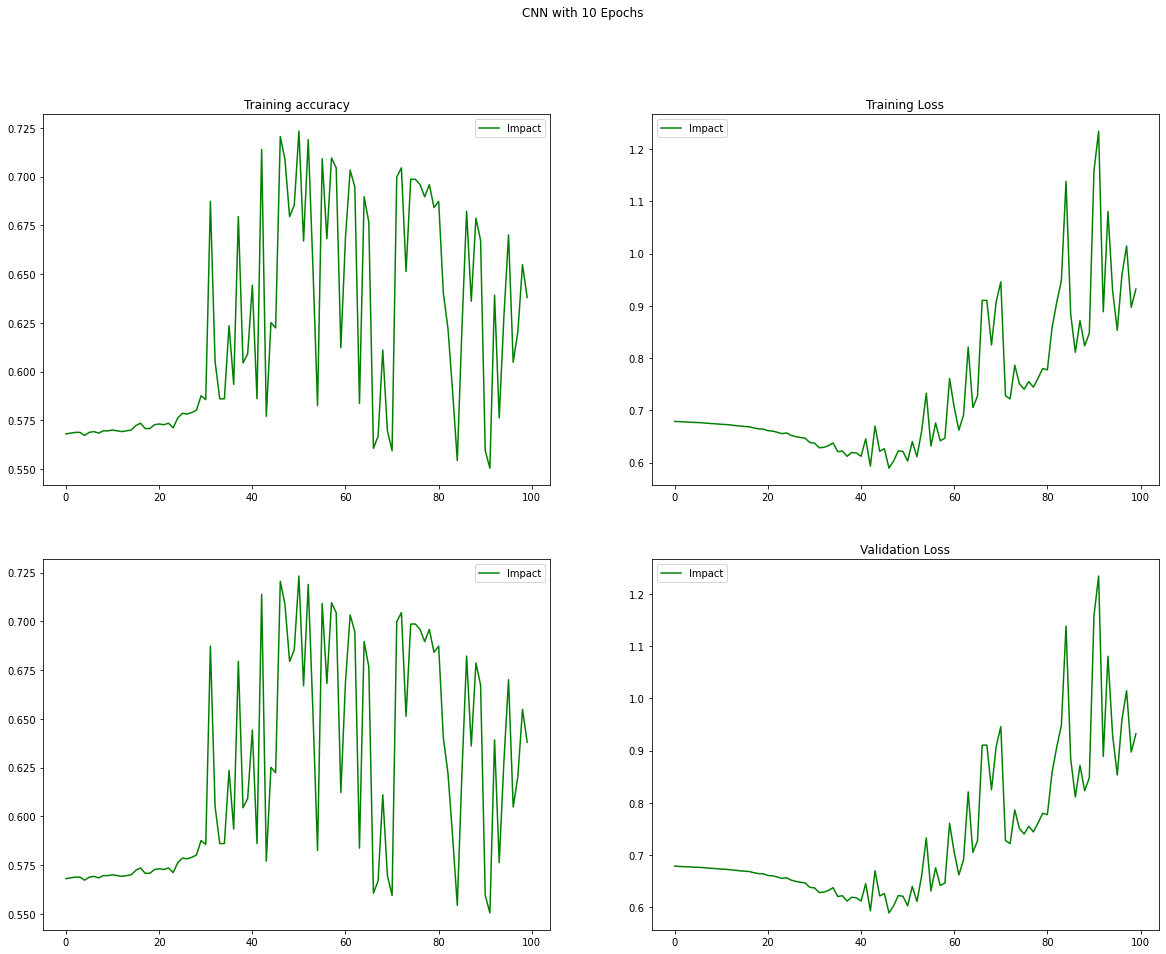

In [508]:
epochs_range = range(len(history.history[model.metrics_names[1]]))

fig, axs = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('CNN with 10 Epochs')


axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[1])], 'b', label='Impact', color='green')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[13])], 'b', label='CWE-312', color='blue')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[14])], 'b', label='CWE-295', color='red')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[15])], 'b', label='CWE-276', color='purple')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[16])], 'b', label='CWE-327', color='black')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[17])], 'b', label='CWE-330', color='yellow')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[18])], 'b', label='CWE-200', color='brown')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[19])], 'b', label='CWE-89', color='cyan')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[20])], 'b', label='CWE-919', color='orange')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[21])], 'b', label='CWE-649', color='red')
# axs[0,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[22])], 'b', label='CWE-250', color='pink')

axs[0,0].set_title('Training accuracy')
axs[0,0].legend()


axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[0])], 'b', label='Impact', color='green')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[2])], 'b', label='CWE-312', color='blue')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[3])], 'b', label='CWE-295', color='red')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[4])], 'b', label='CWE-276', color='purple')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[5])], 'b', label='CWE-327', color='black')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[6])], 'b', label='CWE-330', color='yellow')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[7])], 'b', label='CWE-200', color='brown')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[8])], 'b', label='CWE-89', color='cyan')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[9])], 'b', label='CWE-919', color='orange')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[10])], 'b', label='CWE-649', color='red')
# axs[0,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[11])], 'b', label='CWE-250', color='pink')

axs[0,1].set_title('Training Loss')
axs[0,1].legend()

axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[1])], 'b', label='Impact', color='green')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[13])], 'b', label='CWE-312', color='blue')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[14])], 'b', label='CWE-295', color='red')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[15])], 'b', label='CWE-276', color='purple')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[16])], 'b', label='CWE-327', color='black')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[17])], 'b', label='CWE-330', color='yellow')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[18])], 'b', label='CWE-200', color='brown')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[19])], 'b', label='CWE-89', color='cyan')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[20])], 'b', label='CWE-919', color='orange')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[21])], 'b', label='CWE-649', color='red')
# axs[1,0].plot(epochs_range, history.history['val_%s'%(model.metrics_names[22])], 'b', label='CWE-250', color='pink')

axs[1,0].legend()


axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[0])], 'b', label='Impact', color='green')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[2])], 'b', label='CWE-312', color='blue')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[3])], 'b', label='CWE-295', color='red')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[4])], 'b', label='CWE-276', color='purple')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[5])], 'b', label='CWE-327', color='black')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[6])], 'b', label='CWE-330', color='yellow')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[7])], 'b', label='CWE-200', color='brown')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[8])], 'b', label='CWE-89', color='cyan')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[9])], 'b', label='CWE-919', color='orange')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[10])], 'b', label='CWE-649', color='red')
# axs[1,1].plot(epochs_range, history.history['val_%s'%(model.metrics_names[11])], 'b', label='CWE-250', color='pink')

axs[1,1].set_title('Validation Loss')
axs[1,1].legend()


In [504]:
max(history.history['val_accuracy'])

0.7232212424278259

In [503]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [143]:
'val_%s'%(model.metrics_names[1])

'val_dense_2_loss'

In [144]:
history.history['val_dense_9_loss']

[0.16438379883766174,
 0.1675926297903061,
 0.16166527569293976,
 0.1612313687801361,
 0.16064667701721191,
 0.15995553135871887,
 0.1590382307767868,
 0.15810617804527283,
 0.15720364451408386,
 0.15632781386375427,
 0.1565946340560913,
 0.15548226237297058,
 0.1549220234155655,
 0.15476615726947784,
 0.1546388864517212,
 0.15448959171772003,
 0.15492309629917145,
 0.15495231747627258,
 0.15476657450199127,
 0.1555100530385971,
 0.15486645698547363,
 0.15493229031562805,
 0.1548188179731369,
 0.15504780411720276,
 0.15488138794898987,
 0.1544545590877533,
 0.15444621443748474,
 0.15459050238132477,
 0.15419669449329376,
 0.15402966737747192,
 0.153910830616951,
 0.15383554995059967,
 0.15358220040798187,
 0.15347445011138916,
 0.15363657474517822,
 0.15324735641479492,
 0.15302832424640656,
 0.15394403040409088,
 0.15259389579296112,
 0.1536216288805008,
 0.1524152159690857,
 0.15235058963298798,
 0.15208470821380615,
 0.1526879519224167,
 0.1530533730983734,
 0.15210752189159393,
 0.